In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
file_path = r"C:\Users\ahlam\Desktop\DATA ANALYST Bootcamp\Sprint 10\social_media_vs_productivity.csv"
df = pd.read_csv(file_path)

In [11]:
print(df.shape)
print(df.columns)
print(df.isnull().sum())
print(df.head())
print(df.describe())

(30000, 19)
Index(['age', 'gender', 'job_type', 'daily_social_media_time',
       'social_platform_preference', 'number_of_notifications',
       'work_hours_per_day', 'perceived_productivity_score',
       'actual_productivity_score', 'stress_level', 'sleep_hours',
       'screen_time_before_sleep', 'breaks_during_work', 'uses_focus_apps',
       'has_digital_wellbeing_enabled', 'coffee_consumption_per_day',
       'days_feeling_burnout_per_month', 'weekly_offline_hours',
       'job_satisfaction_score'],
      dtype='object')
age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          221

In [12]:
df_social = df
# Información general del dataset (tipos de datos, no nulos)
print(df_social.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

LIMPIAR COLUMNAS PARA TENER MISMAS FILAS QUE EN POWER BI

In [13]:
# Borrar filas con valores nulos de estas dos columnas
#['daily_social_media_time', 'actual_productivity_score']

df_clean = df_social.dropna(subset=['daily_social_media_time', 'actual_productivity_score'])
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 25095 entries, 0 to 29998
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             25095 non-null  int64  
 1   gender                          25095 non-null  object 
 2   job_type                        25095 non-null  object 
 3   daily_social_media_time         25095 non-null  float64
 4   social_platform_preference      25095 non-null  object 
 5   number_of_notifications         25095 non-null  int64  
 6   work_hours_per_day              25095 non-null  float64
 7   perceived_productivity_score    23730 non-null  float64
 8   actual_productivity_score       25095 non-null  float64
 9   stress_level                    23527 non-null  float64
 10  sleep_hours                     22883 non-null  float64
 11  screen_time_before_sleep        23246 non-null  float64
 12  breaks_during_work              25095

1.¿Hay relación entre horas en redes sociales y horas productivas reales?

<Figure size 1000x700 with 0 Axes>

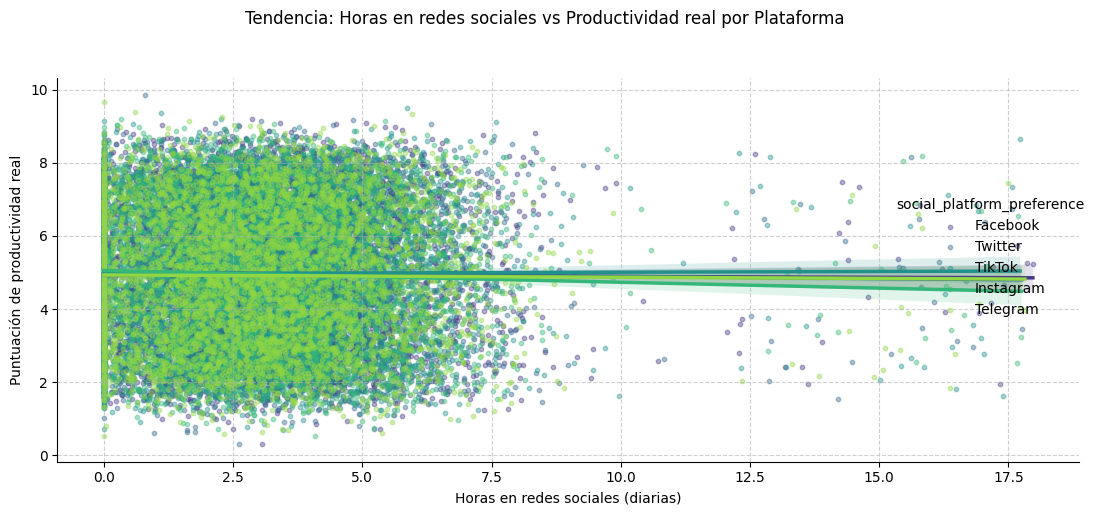

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

# --- Gráfico de Dispersión con Línea de Regresión
plt.figure(figsize=(10, 7)) 
g = sns.lmplot(
    data=df_clean,
    x='daily_social_media_time',
    y='actual_productivity_score',
    hue='social_platform_preference', # Añadimos 'hue' para diferenciar por plataforma social, 'palette' para colores, y 'markers' para distintos puntos.
    palette='viridis',               # Elegimos una paleta de colores bonita (puedes probar 'coolwarm', 'Set2', etc.)
    aspect=1.8,                      # Relación de aspecto (width/height)
    height=5,                        # Altura de cada faceta (el gráfico total se ajusta)
    scatter_kws={'alpha': 0.4, 's': 10}, # Ajustamos la transparencia y el tamaño de los puntos
    line_kws={'lw': 2.5}             # Ajustamos el ancho de la línea de regresión
)

# Añadimos un título y etiquetas
g.set_axis_labels('Horas en redes sociales (diarias)', 'Puntuación de productividad real')
g.set_titles("Relación entre Horas en Redes y Productividad por Plataforma")
plt.suptitle('Tendencia: Horas en redes sociales vs Productividad real por Plataforma', y=1.02) # Título principal
plt.grid(True, linestyle='--', alpha=0.6) # Añadir una cuadrícula para mejor lectura
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajustar layout para evitar que el título se solape
plt.show()


C:\Users\ahlam\AppData\Local\Temp\ipykernel_13300\1480363926.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='social_platform_preference', y='actual_productivity_score', palette='viridis')


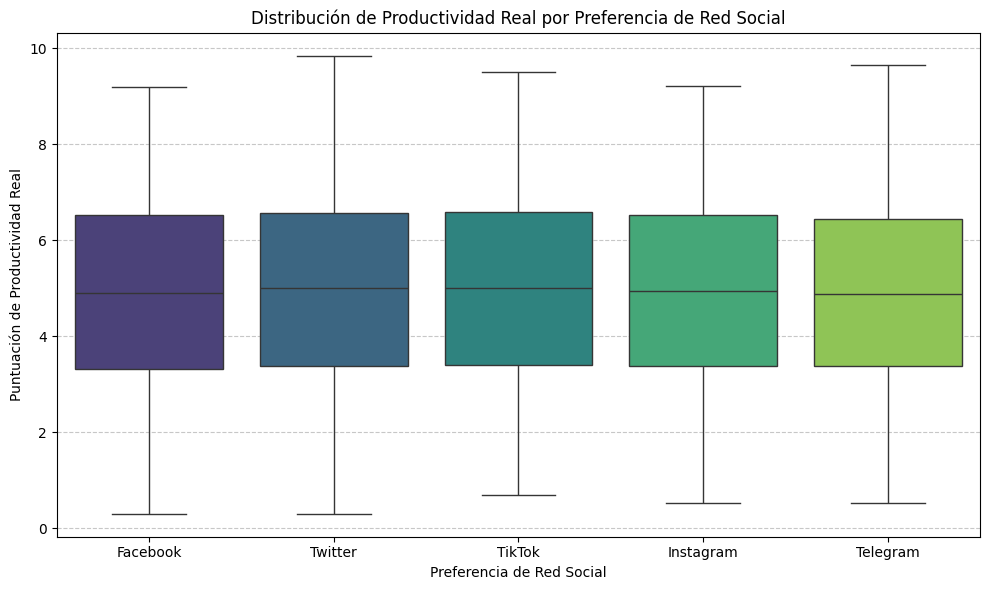

In [ ]:

# --- Un boxplot complementario para visualizar la productividad por plataforma ---

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='social_platform_preference', y='actual_productivity_score', palette='viridis')
plt.title('Distribución de Productividad Real por Preferencia de Red Social')
plt.xlabel('Preferencia de Red Social')
plt.ylabel('Puntuación de Productividad Real')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Conclusión del Gráfico 1:
Este gráfico visualmente sugiere que el tiempo dedicado a las redes sociales diariamente no es un predictor lineal significativo de la productividad real, ni hay diferencias aparentes en esta relación en función de la plataforma social preferida. La productividad real parece estar influenciada por otros factores no representados en este gráfico.

Conclusión del Gráfico 2:
Este boxplot complementa y valida las conclusiones del gráfico de dispersión: la preferencia por una red social específica no parece tener un impacto significativo en la puntuación promedio de productividad real de los usuarios. Todos los grupos muestran distribuciones de productividad muy similares, con medianas y rangos intercuartílicos casi idénticos.

C:\Users\ahlam\AppData\Local\Temp\ipykernel_13300\1740808424.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['usage_category'] = pd.cut(df_clean['daily_social_media_time'], bins=bins, labels=labels, include_lowest=True)


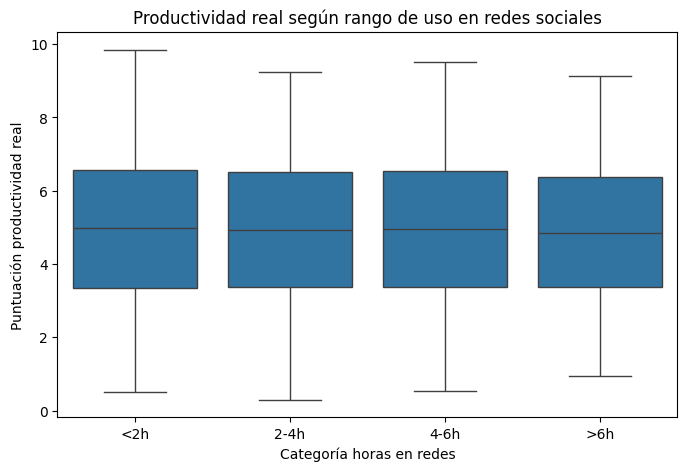

In [16]:
# 2. Categorizar en rangos de uso para comparar medias
bins = [0, 2, 4, 6, df_social['daily_social_media_time'].max()]
labels = ['<2h', '2-4h', '4-6h', '>6h']
df_clean['usage_category'] = pd.cut(df_clean['daily_social_media_time'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x='usage_category', y='actual_productivity_score')
plt.title('Productividad real según rango de uso en redes sociales')
plt.xlabel('Categoría horas en redes')
plt.ylabel('Puntuación productividad real')
plt.show()



2. ESTRÉS

                             count      mean       std  min  25%  50%  75%  \
social_platform_preference                                                   
Facebook                    4661.0  5.518558  2.889958  1.0  3.0  6.0  8.0   
Instagram                   4712.0  5.534380  2.842219  1.0  3.0  6.0  8.0   
Telegram                    4648.0  5.475258  2.875105  1.0  3.0  5.0  8.0   
TikTok                      4791.0  5.519724  2.851212  1.0  3.0  6.0  8.0   
Twitter                     4715.0  5.537858  2.862423  1.0  3.0  6.0  8.0   

                             max  
social_platform_preference        
Facebook                    10.0  
Instagram                   10.0  
Telegram                    10.0  
TikTok                      10.0  
Twitter                     10.0  


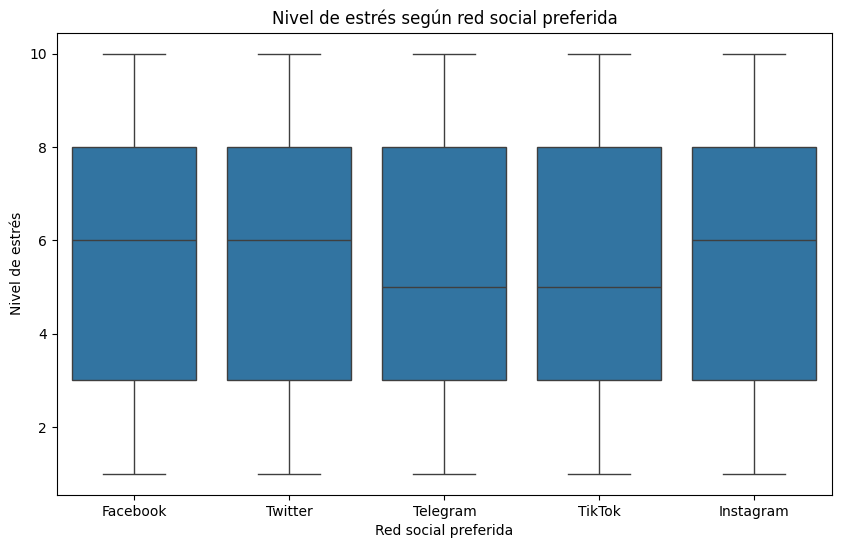

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Estadísticas descriptivas
stress_by_platform = df_clean.groupby('social_platform_preference')['stress_level'].describe()
print(stress_by_platform)

# Boxplot para visualizar estrés por red social
plt.figure(figsize=(10,6))
sns.boxplot(data=df_social, x='social_platform_preference', y='stress_level')
plt.title('Nivel de estrés según red social preferida')
plt.xlabel('Red social preferida')
plt.ylabel('Nivel de estrés')
plt.show()


C:\Users\ahlam\AppData\Local\Temp\ipykernel_13300\1410420925.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


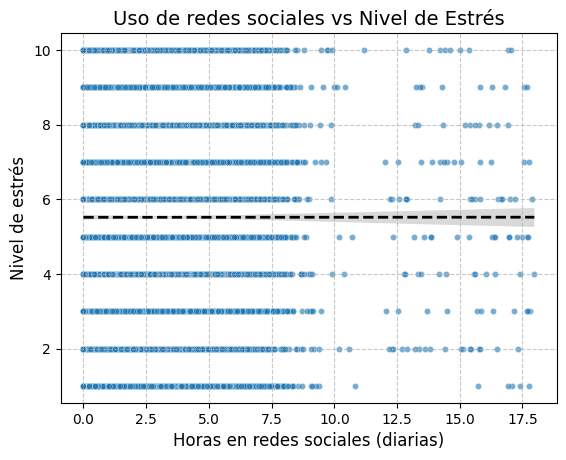

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Asegúrate de importar pandas

sns.scatterplot(
    data=df_clean,
    x='daily_social_media_time',
    y='stress_level',
    palette='coolwarm',
    alpha=0.6,
    s=20 # Tamaño de los puntos
)

# Añadir la línea de regresión global
sns.regplot(
    data=df_clean,
    x='daily_social_media_time',
    y= 'stress_level',
    scatter=False, # No dibujar los puntos de nuevo
    color='black', # Color de la línea de tendencia
    line_kws={'linestyle': '--', 'linewidth': 2}, # Estilo de la línea
    ci=95 # Intervalo de confianza del 95% alrededor de la línea
)

plt.title('Uso de redes sociales vs Nivel de Estrés', fontsize=14)
plt.xlabel('Horas en redes sociales (diarias)', fontsize=12)
plt.ylabel('Nivel de estrés', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

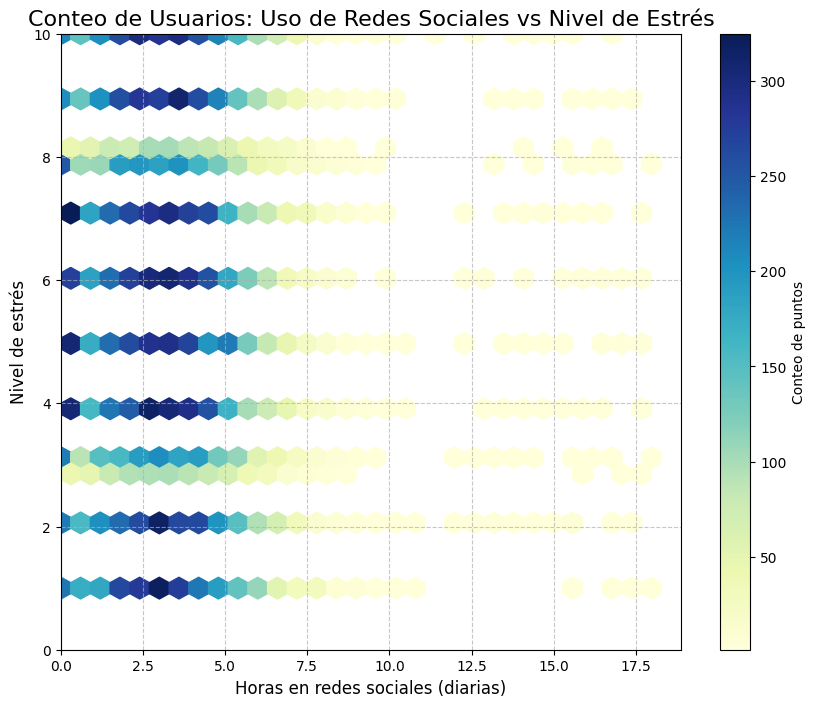

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.hexbin(
    x=df['daily_social_media_time'],
    y=df['stress_level'],
    gridsize=30,    # Número de hexágonos en cada dirección
    cmap='YlGnBu',  # Mapa de colores (Yellow-Green-Blue)
    mincnt=1        # Mínimo de puntos para que se muestre un hexágono
)
plt.colorbar(label='Conteo de puntos') # Añadir barra de color
plt.title('Conteo de Usuarios: Uso de Redes Sociales vs Nivel de Estrés', fontsize=16)
plt.xlabel('Horas en redes sociales (diarias)', fontsize=12)
plt.ylabel('Nivel de estrés', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, df['daily_social_media_time'].max() * 1.05)
plt.ylim(0, 10)
plt.show()

Conteo de Usuarios: Uso de Redes Sociales vs Nivel de Estrés (Hexbin Plot)
    Interpretación: Este gráfico muestra la densidad de usuarios en cada combinación de horas en redes y nivel de estrés. Las áreas más oscuras (más usuarios) se concentran en niveles de estrés medios (alrededor de 4-7) y en rangos de uso de redes moderados (0-5 horas). Esto reafirma la falta de una tendencia lineal y muestra dónde se agrupan la mayoría de los individuos.

                             count      mean       std  min  25%  50%  75%  \
social_platform_preference                                                   
Facebook                    5529.0  5.525231  2.892012  1.0  3.0  6.0  8.0   
Instagram                   5626.0  5.546036  2.839611  1.0  3.0  6.0  8.0   
Telegram                    5627.0  5.472721  2.877168  1.0  3.0  5.0  8.0   
TikTok                      5713.0  5.499387  2.861358  1.0  3.0  5.0  8.0   
Twitter                     5601.0  5.527406  2.862256  1.0  3.0  6.0  8.0   

                             max  
social_platform_preference        
Facebook                    10.0  
Instagram                   10.0  
Telegram                    10.0  
TikTok                      10.0  
Twitter                     10.0  


C:\Users\ahlam\AppData\Local\Temp\ipykernel_13300\2592564673.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_social, x='social_platform_preference', y='stress_level', palette='viridis', inner='quartile')


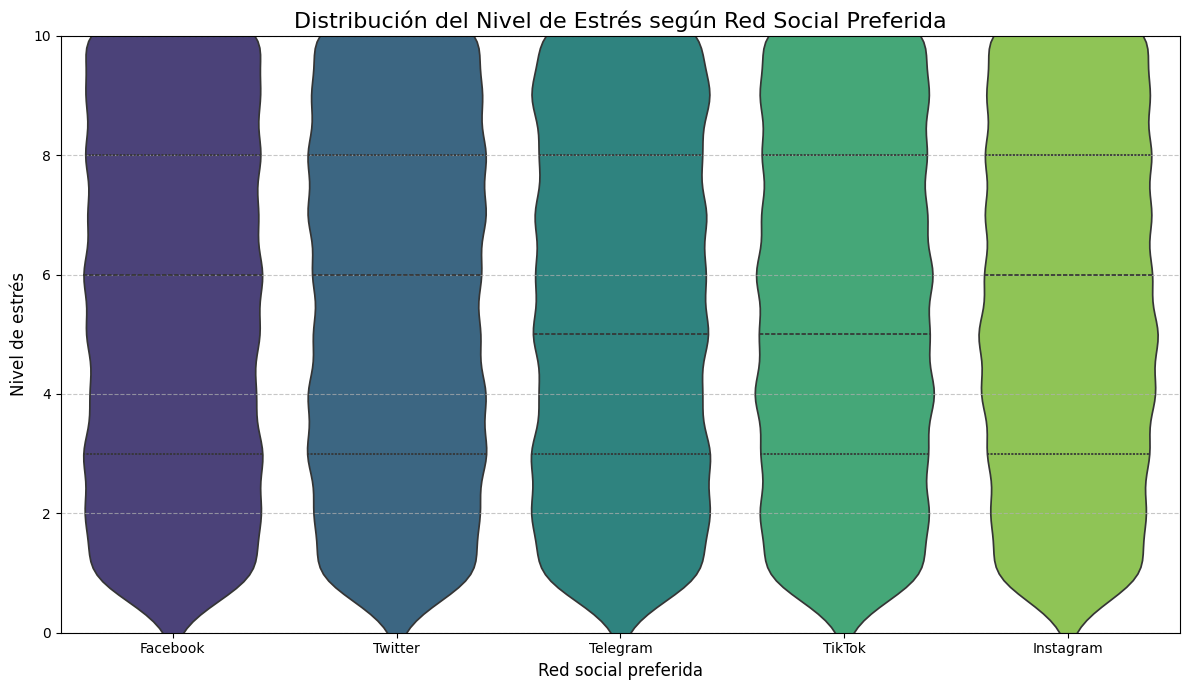

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import pandas as pd

stress_by_platform = df_social.groupby('social_platform_preference')['stress_level'].describe()
print(stress_by_platform)

# --- Gráfico de Violín para visualizar el estrés por red social ---
plt.figure(figsize=(12, 7)) 
sns.violinplot(data=df_social, x='social_platform_preference', y='stress_level', palette='viridis', inner='quartile')
# 'palette' para colores bonitos
# 'inner="quartile"' muestra los cuartiles dentro de cada violín, similar a un boxplot

plt.title('Distribución del Nivel de Estrés según Red Social Preferida', fontsize=16)
plt.xlabel('Red social preferida', fontsize=12)
plt.ylabel('Nivel de estrés', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir cuadrícula para mejor lectura
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

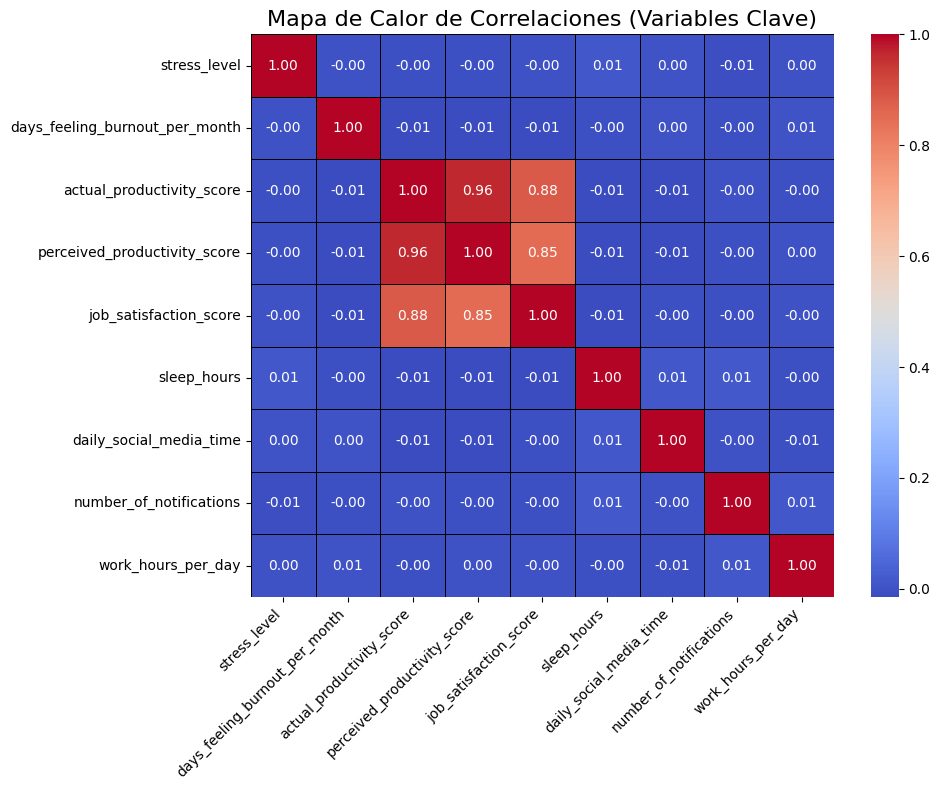

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CORRELACION
#Columnas más importantes para el mapa de calor
important_columns = [
    'stress_level',
    'days_feeling_burnout_per_month',
    'actual_productivity_score',
    'perceived_productivity_score',
    'job_satisfaction_score',
    'sleep_hours',
    'daily_social_media_time',
    'number_of_notifications',
    'work_hours_per_day'
]

# Asegúrar tipo numérico para la correlación.
df_selected = df[important_columns].dropna()

#Calcular la matriz de correlación solo para las columnas seleccionadas ---
corr_matrix_important = df_selected.corr()

# Graficar el Heatmap ---
plt.figure(figsize=(10, 8)) # Ajusta el tamaño para una mejor visualización de menos variables
sns.heatmap(
    data=corr_matrix_important,
    annot=True,     # Mostrar los valores de correlación en las celdas
    cmap="coolwarm", # Paleta de colores. 'coolwarm' es buena para correlaciones positivas/negativas
    fmt=".2f",      # Formato de los números a 2 decimales
    linewidths=.5,  # Líneas entre las celdas
    linecolor='black' # Color de las líneas
)

plt.title("Mapa de Calor de Correlaciones (Variables Clave)", fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje X para mayor legibilidad
plt.yticks(rotation=0) # Asegurar que las etiquetas del eje Y no roten
plt.tight_layout() # Ajustar el diseño para que todo quepa bien
plt.show()

*Correlaciones fuertes y positivas
- actual_productivity_score y perceived_productivity_score: 0.96
    Los usuarios perciben la productividad que realmente producen.
- actual_productivity_score y job_satisfaction_score: 0.88
    Más productividad real se relaciona con mayor satisfacción laboral.
- perceived_productivity_score y job_satisfaction_score: 0.85
    → Si una persona siente que rinde bien, también suele estar más satisfecha con su trabajo.

*Correlaciones débiles o casi nulas: La mayoría de las otras variables (como stress_level, sleep_hours, number_of_notifications, work_hours_per_day) muestran correlaciones cercanas a 0 con otras, indicando poca o ninguna relación lineal con esas variables clave.

*No hay correlaciones negativas fuertes. Las más bajas son -0.01, lo cual es prácticamente cero.


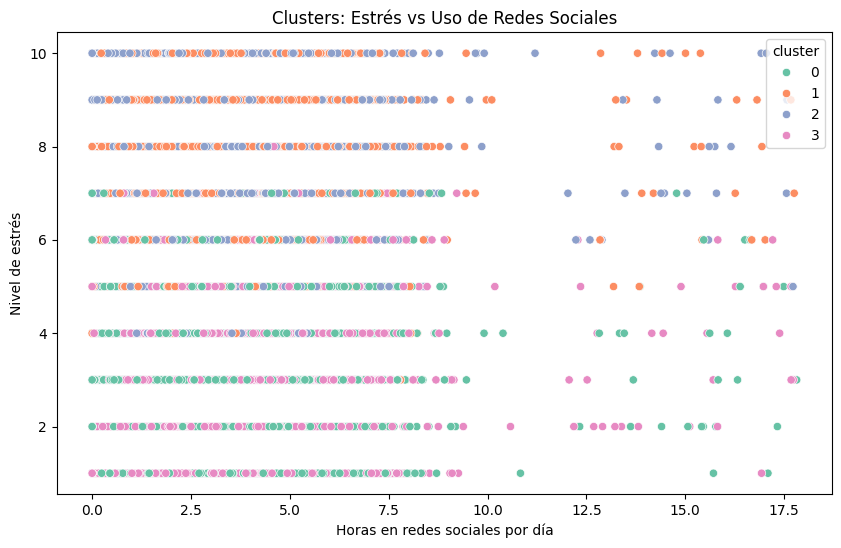

         stress_level  sleep_hours  actual_productivity_score  \
cluster                                                         
0                3.24         6.46                       5.30   
1                7.85         6.63                       3.20   
2                7.79         6.39                       6.70   
3                3.16         6.50                       4.59   

         daily_social_media_time  days_feeling_burnout_per_month  
cluster                                                           
0                           3.15                           24.31  
1                           3.07                           17.43  
2                           3.07                           13.46  
3                           3.15                            7.02  


In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Selección de variables relevantes
features = ['stress_level', 'sleep_hours', 'actual_productivity_score', 
            'daily_social_media_time', 'days_feeling_burnout_per_month']

df_cluster = df_social[features].dropna()

# 2. Escalar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# 3. KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

# 4. Visualización de resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='daily_social_media_time', y='stress_level', hue='cluster', palette='Set2')
plt.title("Clusters: Estrés vs Uso de Redes Sociales")
plt.xlabel("Horas en redes sociales por día")
plt.ylabel("Nivel de estrés")
plt.show()

# 5. Perfil de cada grupo
print(df_cluster.groupby('cluster')[features].mean().round(2))


BURNOUT

             count       mean       std  min  25%   50%   75%   max
age_group                                                          
18-29       6185.0  15.684074  9.229087  0.0  8.0  15.0  24.0  31.0
30-44       8029.0  15.442645  9.197691  0.0  7.0  16.0  23.0  31.0
45-65      10881.0  15.616120  9.280532  0.0  8.0  16.0  24.0  31.0


C:\Users\ahlam\AppData\Local\Temp\ipykernel_13300\822029726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=labels)
C:\Users\ahlam\AppData\Local\Temp\ipykernel_13300\822029726.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  burnout_by_age = df_clean.groupby('age_group')['days_feeling_burnout_per_month'].describe()


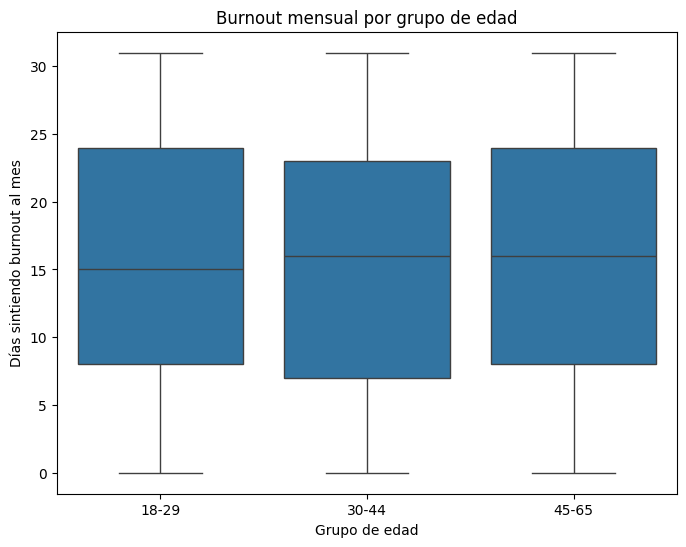

In [23]:
# Crear grupos de edad
bins = [17, 29, 44, 65]
labels = ['18-29', '30-44', '45-65']
df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=labels)

# Estadísticas descriptivas
burnout_by_age = df_clean.groupby('age_group')['days_feeling_burnout_per_month'].describe()
print(burnout_by_age)

# Boxplot de burnout por grupo de edad
plt.figure(figsize=(8,6))
sns.boxplot(data=df_clean, x='age_group', y='days_feeling_burnout_per_month')
plt.title('Burnout mensual por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Días sintiendo burnout al mes')
plt.show()


C:\Users\ahlam\AppData\Local\Temp\ipykernel_13300\25492951.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['social_media_usage_group'] = pd.cut(


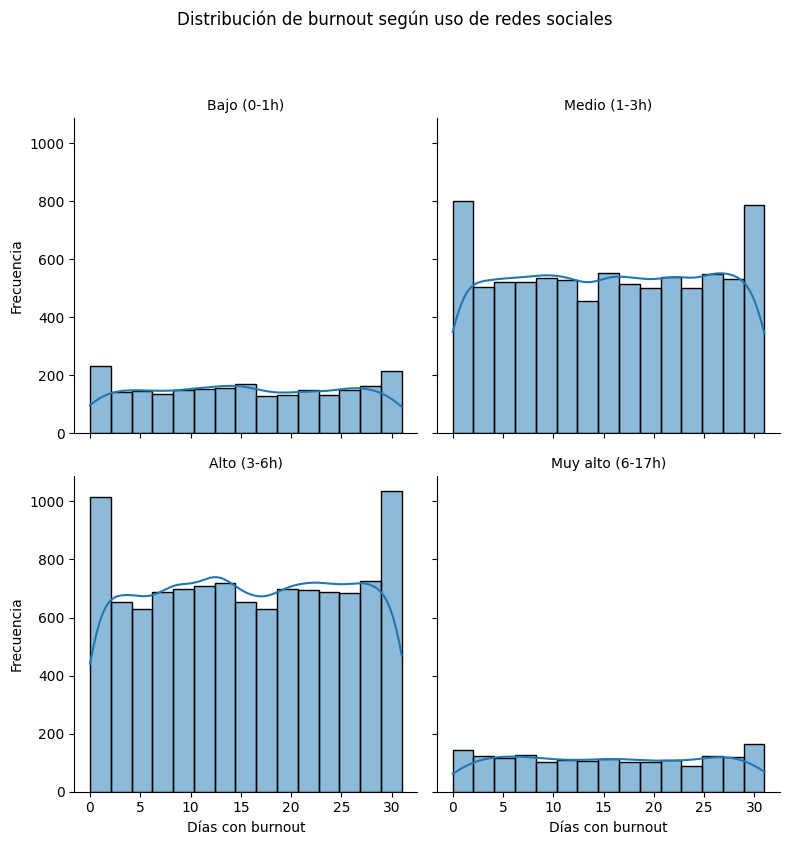

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la nueva columna categórica dentro de df_clean
df_clean['social_media_usage_group'] = pd.cut(
    df_clean['daily_social_media_time'],
    bins=[0, 1, 3, 6, 17],  # ajusta los cortes si lo deseas
    labels=['Bajo (0-1h)', 'Medio (1-3h)', 'Alto (3-6h)', 'Muy alto (6-17h)']
)

# Usar FacetGrid con el mismo df_clean
g = sns.FacetGrid(df_clean, col='social_media_usage_group', col_wrap=2, height=4)
g.map(sns.histplot, 'days_feeling_burnout_per_month', bins=15, kde=True)

g.set_titles("{col_name}")
g.set_axis_labels("Días con burnout", "Frecuencia")
plt.suptitle("Distribución de burnout según uso de redes sociales", y=1.05)
plt.tight_layout()
plt.show()


In [ ]:
# Contar valores nulos en la columna 'stress_level'
nulos_stress_level = df_clean['stress_level'].isnull().sum()
print(f"Número de valores nulos en 'stress_level': {nulos_stress_level}")

# Porcentaje de nulos (opcional, pero útil)
porcentaje_nulos = (nulos_stress_level / len(df)) * 100
print(f"Porcentaje de valores nulos en 'stress_level': {porcentaje_nulos:.2f}%")

Número de valores nulos en 'stress_level': 1568
Porcentaje de valores nulos en 'stress_level': 5.23%


In [ ]:

# Eliminar filas donde 'stress_level' es NaN
df_cleaned_stress = df_clean.dropna(subset=['stress_level'])

print(f"\nDimensiones del DataFrame original: {df.shape}")
print(f"Dimensiones del DataFrame después de limpiar 'stress_level': {df_cleaned_stress.shape}")

# Confirmar que ya no hay nulos en 'stress_level' en el nuevo DataFrame
print(f"Nulos en 'stress_level' después de limpiar: {df_cleaned_stress['stress_level'].isnull().sum()}")


Dimensiones del DataFrame original: (30000, 19)
Dimensiones del DataFrame después de limpiar 'stress_level': (23527, 19)
Nulos en 'stress_level' después de limpiar: 0


                             count      mean       std  min  25%  50%  75%  \
social_platform_preference                                                   
Facebook                    4661.0  5.518558  2.889958  1.0  3.0  6.0  8.0   
Instagram                   4712.0  5.534380  2.842219  1.0  3.0  6.0  8.0   
Telegram                    4648.0  5.475258  2.875105  1.0  3.0  5.0  8.0   
TikTok                      4791.0  5.519724  2.851212  1.0  3.0  6.0  8.0   
Twitter                     4715.0  5.537858  2.862423  1.0  3.0  6.0  8.0   

                             max  
social_platform_preference        
Facebook                    10.0  
Instagram                   10.0  
Telegram                    10.0  
TikTok                      10.0  
Twitter                     10.0  


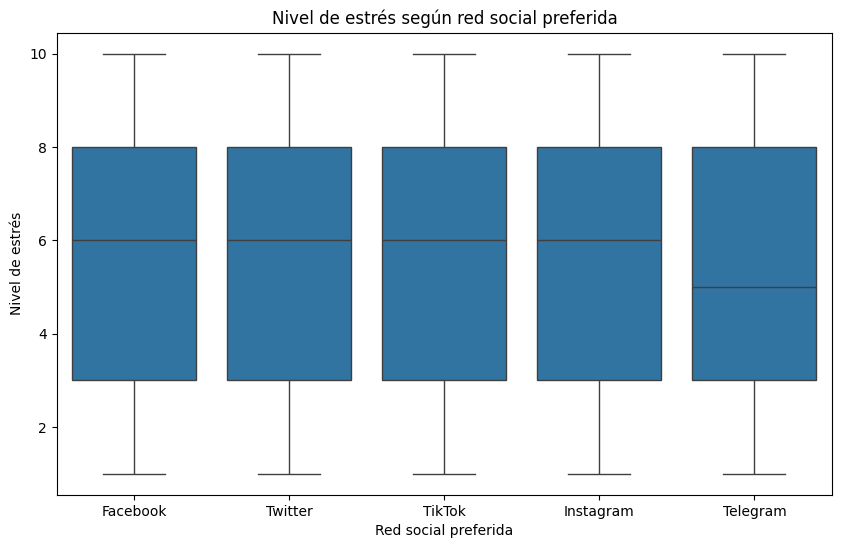

ANOVA estrés entre redes sociales: F = 0.354, p = 0.8413


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Estadísticas descriptivas
stress_by_platform = df_cleaned_stress.groupby('social_platform_preference')['stress_level'].describe()
print(stress_by_platform)

# Boxplot para visualizar estrés por red social
plt.figure(figsize=(10,6))
sns.boxplot(data=df_cleaned_stress, x='social_platform_preference', y='stress_level')
plt.title('Nivel de estrés según red social preferida')
plt.xlabel('Red social preferida')
plt.ylabel('Nivel de estrés')
plt.show()

# ANOVA para ver si hay diferencias significativas en estrés
groups = [group["stress_level"].values for name, group in df_cleaned_stress.groupby("social_platform_preference")]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA estrés entre redes sociales: F = {f_stat:.3f}, p = {p_val:.4f}")